In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import plotly.express as px
import itertools
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion
from platform import processor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import LogisticRegressionCV
import warnings
from sklearn.metrics import r2_score

In [65]:
# import dataset
data = pd.read_csv('data1.csv')

In [66]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [67]:
# display complete row and columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [68]:
# check missing values
data.isnull().sum()
# because missing values shown as "?" in this dataset

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [69]:
# assign all the "?" to NA
data[data == '?'] = np.nan
data.head()
# report number of missing values
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [70]:
# rename some of the columns
data.rename(columns={'native.country':'native_country', 'education.num':'education_num','marital.status':'marital_status','capital.gain':'capital_gain','capital.loss':'capital_loss','hours.per.week':'hours_per_week'}, inplace=True)

In [71]:
# drop rows with missing values
data = data[~data.workclass.isnull()].copy()
data = data[~data.occupation.isnull()].copy()
data = data[~data.native_country.isnull()].copy()

In [72]:
# change the response variable into binary
def convert_to_binary(x):
    if x=='<=50K':
        return 0
    if x=='>50K':
        return 1

data['income'] = data['income'].apply(convert_to_binary)

In [73]:
# EDA
# Visulizing the numerical variables - capital_gain
data.groupby('income')['capital_gain'].mean()
# The mean of capital gain for adults whose income is below 50k is much lower than those whose above 50k.

income
0     148.893838
1    3937.679808
Name: capital_gain, dtype: float64

In [74]:
data.groupby('income')['capital_loss'].mean()
# The mean of capital loss for adults whose income is below 50k is also much lower than those whose above 50k.

income
0     53.448000
1    193.750666
Name: capital_loss, dtype: float64

In [75]:
# Visulizing the numerical variables - age
print('age vs',data.groupby('income')['age'].mean())
# Visulizing the numerical variables - education_num
print('education_num vs',data.groupby('income')['education_num'].mean())
# Visulizing the numerical variables - hours_per_week
print('hour_per_week vs',data.groupby('income')['hours_per_week'].mean())

# the difference between among are less significant

age vs income
0    36.60806
1    43.95911
Name: age, dtype: float64
education_num vs income
0     9.629116
1    11.606420
Name: education_num, dtype: float64
hour_per_week vs income
0    39.348592
1    45.706580
Name: hours_per_week, dtype: float64


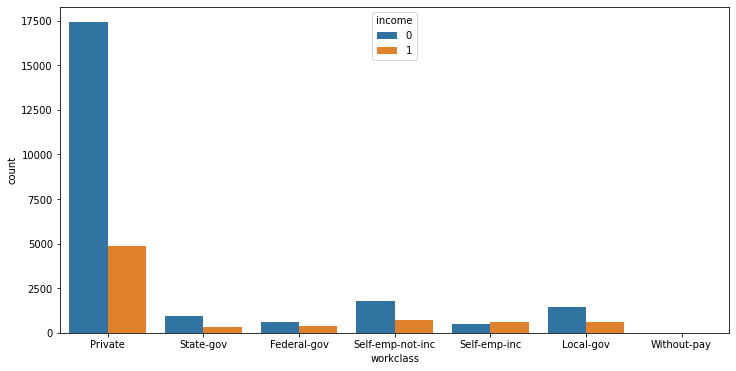

In [76]:
# workclass 
plt.rcParams["figure.figsize"] = (12,6)
ax = sns.countplot(x="workclass", hue="income", data=data)
plt.show()

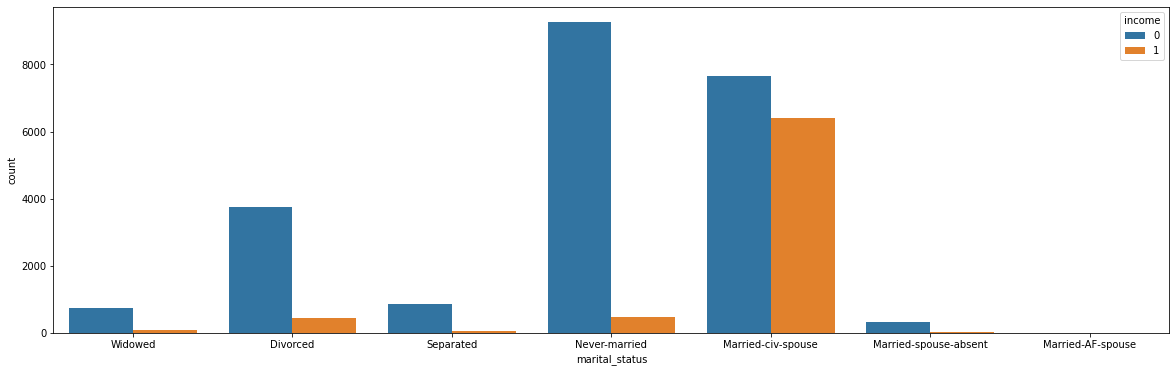

In [77]:
# marital_status
plt.rcParams["figure.figsize"] = (20,6)
ax = sns.countplot(x="marital_status", hue="income", data=data)
plt.show()

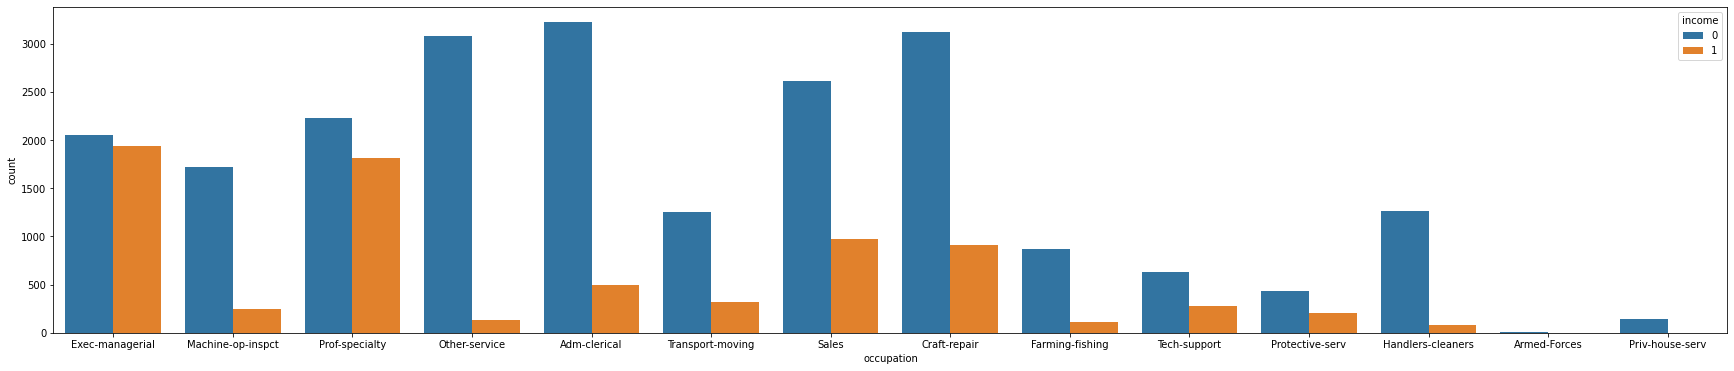

In [78]:
# occupation
plt.rcParams["figure.figsize"] = (30,6)
ax = sns.countplot(x="occupation", hue="income", data=data)
plt.show()

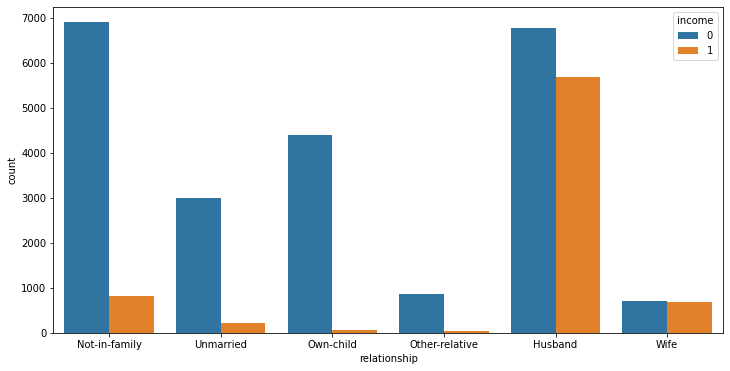

In [79]:
# relationship
plt.rcParams["figure.figsize"] = (12,6)
ax = sns.countplot(x="relationship", hue="income", data=data)
plt.show()

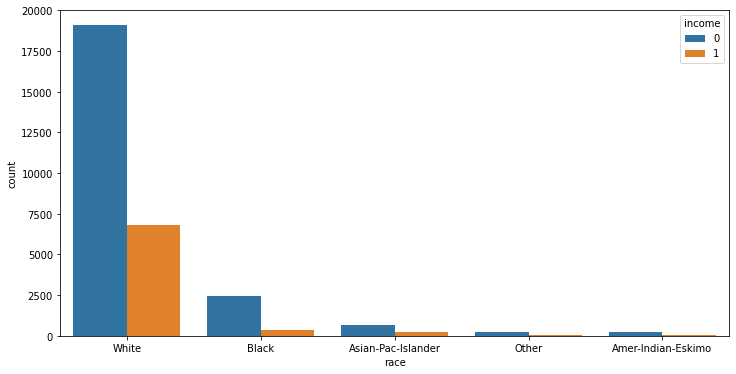

In [80]:
# race
plt.rcParams["figure.figsize"] = (12,6)
ax = sns.countplot(x="race", hue="income", data=data)
plt.show()

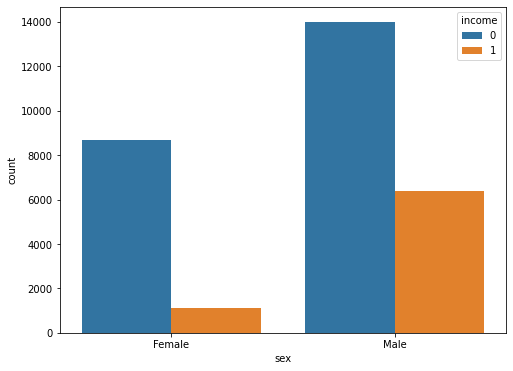

In [81]:
# sex
plt.rcParams["figure.figsize"] = (8,6)
ax = sns.countplot(x="sex", hue="income", data=data)
plt.show()

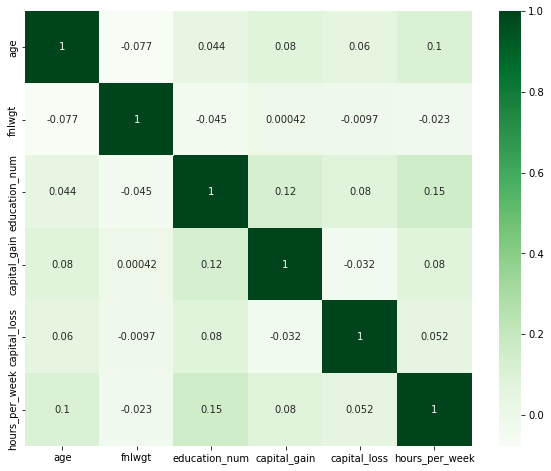

In [82]:
# Visualizing the relationship between the numerical variables
plt.rcParams["figure.figsize"] = (10,8)
data[['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country']].corr()

sns.heatmap(data[['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country']].corr(),annot=True,cmap='Greens')
plt.show()

# this step to see if the variables are independent
# no strong correlation
# the strongest correlation is between age and hours_per_week, which is 0.1

In [83]:
# check the data
data.head()
# clear correlation between education and education_num, therefore remove education
data = data.drop(columns=['education'])

In [84]:
# divide data into X and y
X = data.iloc[:, 0:13]
y = data.iloc[:, 13]

In [85]:
# Standardize and transformer
scaler = StandardScaler()
numeric_features = ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = ['workclass','marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
categorical_transformer = preprocessing.OrdinalEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num',numeric_transformer, numeric_features),
        ('cat',categorical_transformer, categorical_features)])

X = pd.DataFrame(preprocessor.fit_transform(X),columns=X.columns)

In [86]:
# train / test split 
# cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [87]:
warnings.filterwarnings('ignore')
# find the best number of estimators
# Define random forest 
rf_fit1 = RandomForestRegressor(n_estimators=100, 
                                      criterion='mse',
                                      max_depth=None,
                                      min_samples_leaf=1,
                                      min_weight_fraction_leaf=0.0,
                                      max_features='sqrt', # For a proper random forest
                                      max_leaf_nodes=None,
                                      min_impurity_decrease=0.0,
                                      bootstrap=True,
                                      oob_score=True,
                                      random_state=1,
                                      )

# Range of `n_estimators` values to explore.
min_estimators = 100
max_estimators = 700

# Define error list
error_rate = []

# iterate over forest
for i in range(min_estimators, max_estimators,20):
    rf_fit1.set_params(n_estimators=i)
    rf_fit1.fit(X_train, y_train)

    # Record the OOB error for each `n_estimators=i` setting.
    oob_error = 1 - rf_fit1.oob_score_
    error_rate.append((i, oob_error))

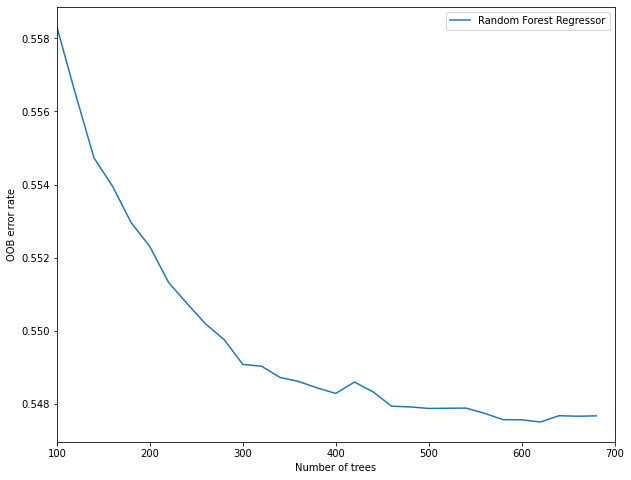

In [88]:
# Plot
xs, ys = zip(*error_rate)
plt.plot(xs, ys, label='Random Forest Regressor')

plt.xlim(min_estimators, max_estimators)
plt.xlabel("Number of trees")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [89]:
# since 500 to 550 is a flat line, choose number of estimator to be 500
# Final forest
rf_best_fit = RandomForestRegressor(n_estimators=500, 
                                       criterion='mse',
                                      max_depth=None,
                                      min_samples_leaf=1,
                                      min_weight_fraction_leaf=0.0,
                                      max_features='sqrt', # For a proper random forest
                                      max_leaf_nodes=None,
                                      min_impurity_decrease=0.0,
                                      bootstrap=True,
                                      oob_score=True,
                                      random_state=1,
                                      
                                      )

rf_best_fit.fit(X_train, y_train)

# Predict over test set
pred_test = rf_best_fit.predict(X_test)

# Mean squared error
mse_rf = np.square(np.subtract(y_test,pred_test)).mean()
mse_rf

0.09898774949186881

In [90]:
# r2 score for Random Forest model
rf_best_fit.score(X_train, y_train)

0.9256015076272471

In [91]:
# visualization
rf_y_pred_test = rf_best_fit.predict(X_test)
rf_y_pred_test

array([0.006, 0.962, 0.41 , ..., 0.02 , 0.02 , 0.012])

Area under the ROC curve : 0.911492


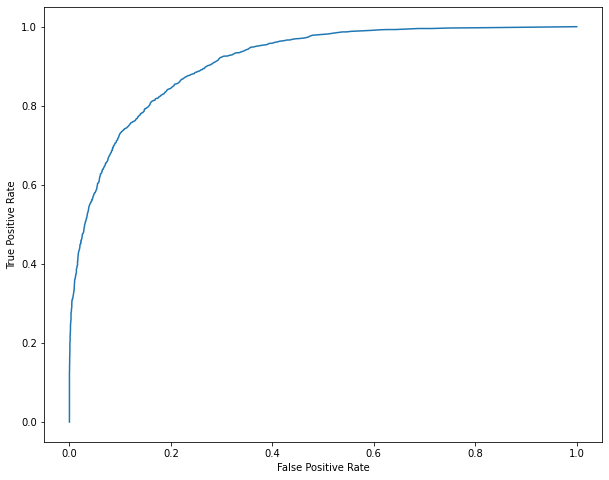

In [92]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_y_pred_test)

roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
# The random forest model have low r_squared result and the high area under curve
# Next, plot the variable importance then fit the logistic model to compare with the random forest model

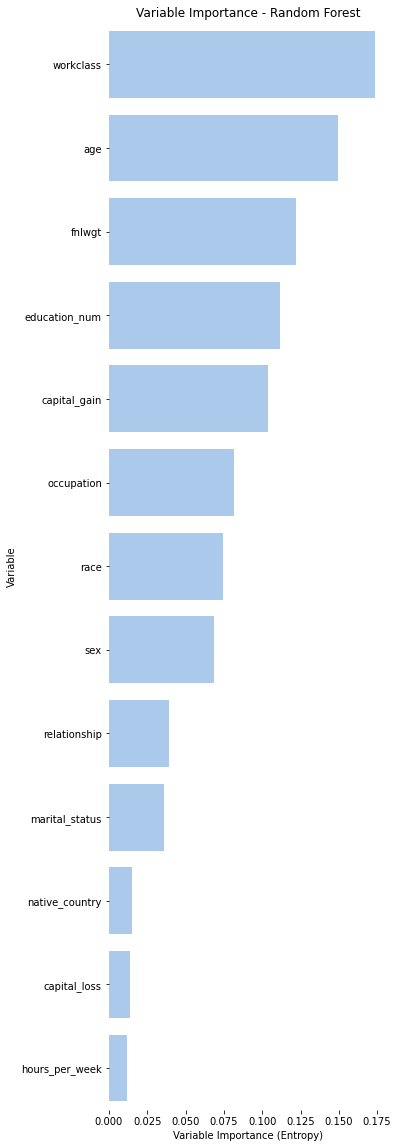

In [93]:
# Variable importance
importances = rf_best_fit.feature_importances_
indices = np.argsort(importances)[::-1] 

f, ax = plt.subplots(figsize=(5, 20))
plt.title("Variable Importance - Random Forest")
sns.set_color_codes("pastel")
sns.barplot(y=[X_train.columns[i] for i in indices], 
            x=importances[indices], 
            label="Total", color="b")
ax.set(ylabel="Variable",
       xlabel="Variable Importance (Entropy)")
sns.despine(left=True, bottom=True)

# workclass and age are the most important variables
# country, race and sex are the least important variables

In [94]:
# fit the logistic model
logit_fit = LogisticRegression(penalty='l2')
logit_fit.fit(X_train, y_train)

LogisticRegression()

In [95]:
# logistic model r2
logit_fit.score(X_train, y_train)

0.8207965518670479

In [96]:
warnings.filterwarnings('ignore')
logit_cv_fit = LogisticRegressionCV(cv=10, random_state=1,penalty='l2').fit(X_train, y_train)

In [97]:
# logistic cross validation model r2
logit_cv_fit.score(X_train, y_train)

# result is slightly better than without cv

0.8208794396783953

In [98]:
logit_pred_test = logit_fit.predict(X_test)
print(accuracy_score(y_test, logit_pred_test))

logit_pred_test2 = logit_cv_fit.predict(X_test)
print(accuracy_score(y_test, logit_pred_test2))
# the achieve the accuracy score of 0.82

0.8226421349245815
0.8224763799104923


Area under the ROC curve : 0.703753


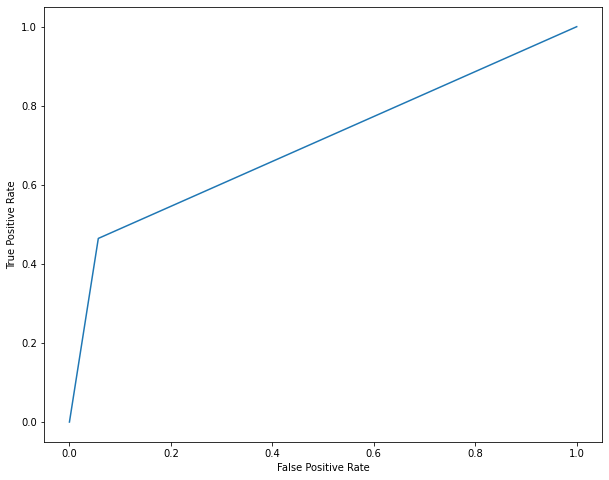

In [99]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, logit_pred_test)

roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc) 

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [100]:
# Comparing with the logistic models, the Random Forest model achieved higher r2 and AUC on the trainning set. However it performed badly on the test set.
# The logistic model have an overall better performance.